In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, roc_curve, r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
print("succesful importing")

succesful importing


In [30]:
path = ('/content/drive/MyDrive/Data_Science/model/Weather_history_jordan_project/data_weather_jordan/amman_data_For_ML.csv')
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
print(df.head())

            maxtempC  mintempC  avgtempC  totalprecipMM  windspeedKmph  \
date                                                                     
2008-07-01        34        24        28            0.0             12   
2008-07-02        34        23        28            0.0             13   
2008-07-03        34        23        27            0.0             12   
2008-07-04        34        21        27            0.0             13   
2008-07-05        34        23        28            0.0             13   

            sunhour  weatherCode  humidity  visibilityKm  pressureMB  ...  \
date                                                                  ...   
2008-07-01     13.6          113        48            10        1006  ...   
2008-07-02     13.6          113        47            10        1006  ...   
2008-07-03     13.6          113        51            10        1006  ...   
2008-07-04     13.6          113        54            10        1006  ...   
2008-07-05     13.6

## DATA PREPROCESSING

In [43]:
features = df.drop(['maxtempC','avgtempC','mintempC','sunrise','sunset'],axis = 1)
target = df[['maxtempC']]

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target).reshape(-1)
#target_scaled_1d = target_scaled.reshape(-1)
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns, index=features.index)

In [44]:
print(target_scaled.shape)
print(target_scaled.ndim)

(4683,)
1


In [45]:
features_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4683 entries, 2008-07-01 to 2021-04-26
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   totalprecipMM      4683 non-null   float64
 1   windspeedKmph      4683 non-null   float64
 2   sunhour            4683 non-null   float64
 3   weatherCode        4683 non-null   float64
 4   humidity           4683 non-null   float64
 5   visibilityKm       4683 non-null   float64
 6   pressureMB         4683 non-null   float64
 7   cloudcover         4683 non-null   float64
 8   DewPointC          4683 non-null   float64
 9   WindGustKmph       4683 non-null   float64
 10  moon_illumination  4683 non-null   float64
 11  month              4683 non-null   float64
 12  month_sin          4683 non-null   float64
 13  month_cos          4683 non-null   float64
 14  day                4683 non-null   float64
 15  day_sin            4683 non-null   float64
 16  day_co

In [46]:
# Select only the numeric columns you want to visualize as box plots
#y_col = features_scaled.select_dtypes(include=np.number).columns

# Create the box plot with the selected columns
fig = px.box(features_scaled_df,
             title='Temperature and Weather Metrics in Amman from 2008 to 2021')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [47]:
X = features_scaled
y = target_scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False, test_size=0.2)

In [48]:
models = {'Linear Regression': LinearRegression(),
          'Random Forest': RandomForestRegressor(n_estimators=100),
          'Decision Tree': DecisionTreeRegressor(),
          'Support Vector Machine': SVR(),
          'K-Nearest Neighbors': KNeighborsRegressor(),
          'Multi-Layer Perceptron': MLPRegressor(max_iter=500),
          'XGBoost': XGBRegressor(),
          'LightGBM': LGBMRegressor(force_row_wise=True)
          }

result = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    result.append([name, r2, mae, mse, rmse])
    print(f"{name} R2 Score: {r2}")
    print(f"{name} Mean Absolute Error: {mae}")
    print(f"{name} Mean Squared Error: {mse}")
    print(f"{name} Root Mean Squared Error: {rmse}")
    print("___"*40)

Linear Regression R2 Score: 0.9458296562145897
Linear Regression Mean Absolute Error: 0.04009875983973713
Linear Regression Mean Squared Error: 0.0024289021804011117
Linear Regression Root Mean Squared Error: 0.049283893721997166
________________________________________________________________________________________________________________________
Random Forest R2 Score: 0.9447217857291272
Random Forest Mean Absolute Error: 0.04031027930343338
Random Forest Mean Squared Error: 0.0024785771289006324
Random Forest Root Mean Squared Error: 0.049785310372645386
________________________________________________________________________________________________________________________
Decision Tree R2 Score: 0.91110740713932
Decision Tree Mean Absolute Error: 0.04857224666163418
Decision Tree Mean Squared Error: 0.003985786272210536
Decision Tree Root Mean Squared Error: 0.06313308381673222
________________________________________________________________________________________________________

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [49]:
result_df = pd.DataFrame(result, columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE'])
best_model = result_df.loc[result_df['R2 Score'].idxmax()]
print(f"The best performing model is {best_model['Model']} with an R2 score of {best_model['R2 Score']}")


The best performing model is LightGBM with an R2 score of 0.9577627494829447


In [50]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



MAE: 1.45
RMSE: 1.78
R² Score: 0.96


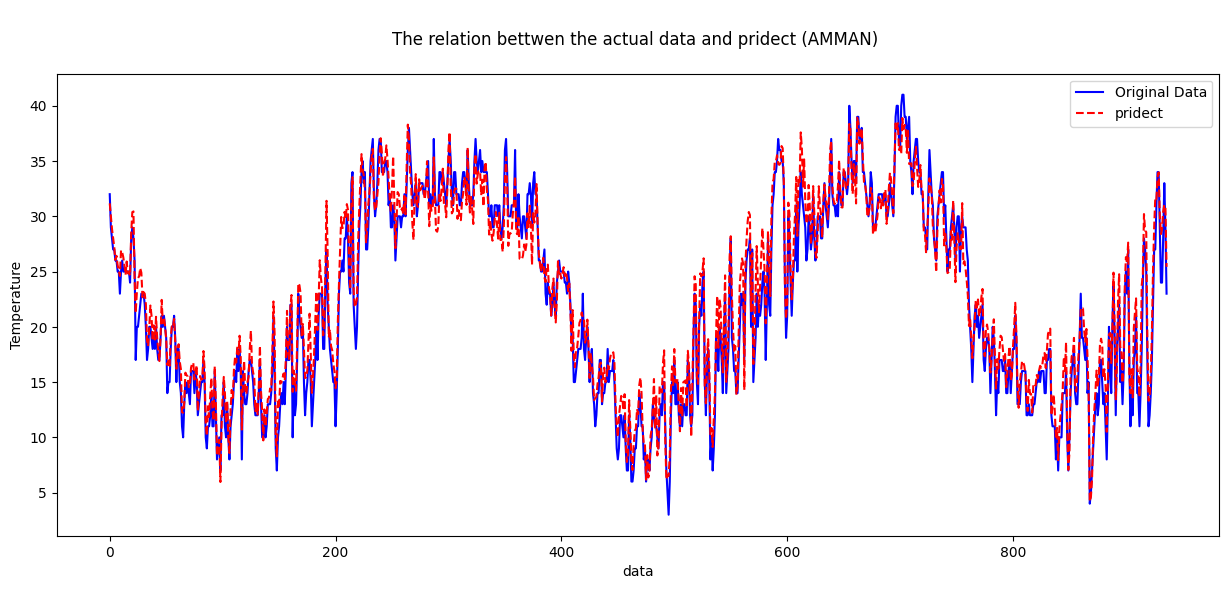

In [51]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R² Score: {r2:.2f}')

plt.figure(figsize=(15, 6))
plt.plot(y_test, label='Original Data', color='blue')
plt.plot(y_pred, label='pridect', color='red', linestyle='--')
plt.title('\nThe relation bettwen the actual data and pridect (AMMAN) \n')
plt.xlabel('data')
plt.ylabel('Temperature')
plt.legend()
plt.show()

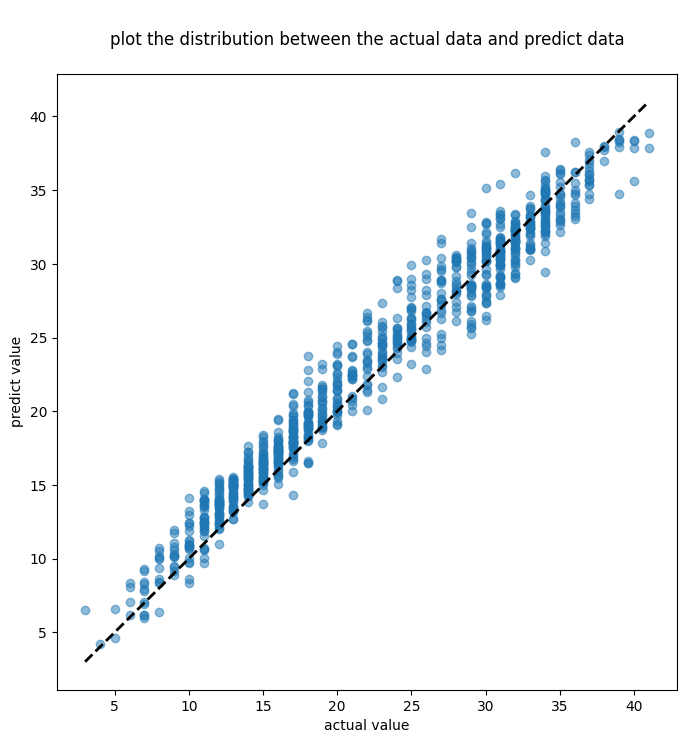

In [52]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('\nplot the distribution between the actual data and predict data\n')
plt.xlabel('actual value')
plt.ylabel('predict value')
plt.show()

<ipython-input-54-92539b9d394e>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




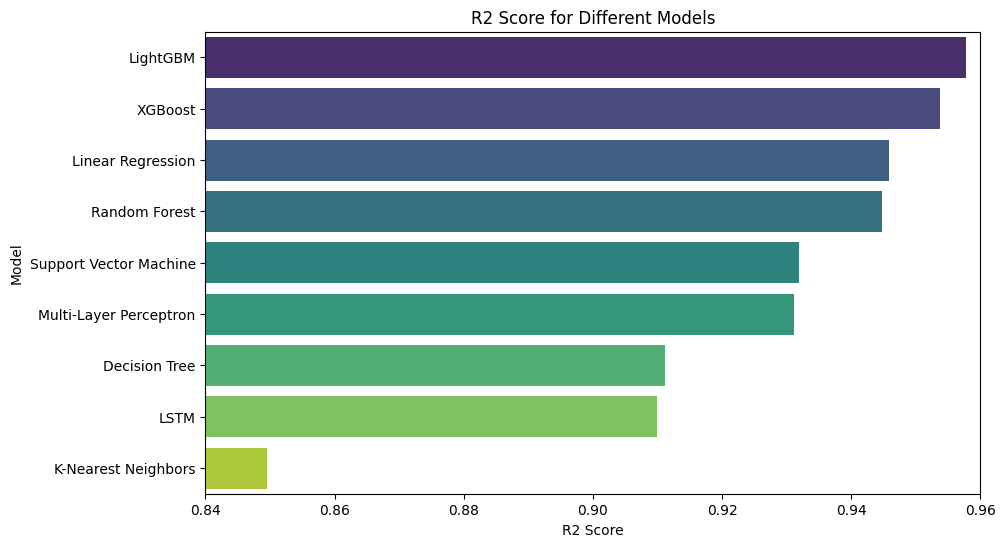

In [54]:
# prompt: models = {'Linear Regression': LinearRegression(),
#           'Random Forest': RandomForestRegressor(n_estimators=100),
#           'Decision Tree': DecisionTreeRegressor(),
#           'Support Vector Machine': SVR(),
#           'K-Nearest Neighbors': KNeighborsRegressor(),
#           'Multi-Layer Perceptron': MLPRegressor(max_iter=500),
#           'XGBoost': XGBRegressor(),
#           'LightGBM': LGBMRegressor(force_row_wise=True)
#           }
# result = []
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     r2 = r2_score(y_test, y_pred)
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mse)
#     result.append([name, r2, mae, mse, rmse])
#     print(f"{name} R2 Score: {r2}")
#     print(f"{name} Mean Absolute Error: {mae}")
#     print(f"{name} Mean Squared Error: {mse}")
#     print(f"{name} Root Mean Squared Error: {rmse}")
#     print("___"*40)
# make plot for this result only r2 and put the x axis from 0.8 to 1
# i want to add the result of lstm is 0.91

# Add LSTM result
result.append(['LSTM', 0.91, None, None, None])

result_df = pd.DataFrame(result, columns=['Model', 'R2 Score', 'MAE', 'MSE', 'RMSE'])

# Plot R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R2 Score', y='Model', data=result_df.sort_values('R2 Score', ascending=False), palette='viridis')
plt.title('R2 Score for Different Models')
plt.xlabel('R2 Score')
plt.xlim(0.84, 0.96)  # Set x-axis limits from 0.8 to 1
plt.ylabel('Model')
plt.show()